# K-means iris case-study 

In dit case study werken we aan een iris-dataset, die informatie over bloemen bevat. 

De dataset bevat 150 observaties en 5 kolommen. Ons doel is om Kmeans te gebruiken om de records van bloemen in klassen te groeperen op basis van hun kenmerken (sepal length, sepal width, petal length, petal width)

Stappen
In dit notitieboek volgen we de volgende stappen:

Stap 1 - Laden van de vereiste bibliotheken en modules

Stap 2 - De gegevens lezen en basisgegevenscontroles uitvoeren

Stap 3 - De nodige manipulaties uitvoeren

Stap 4 - Visualiseren van de gegevens

Stap 5 - Een k-mean-model maken en valideren


# Stap 1 - Laden van de vereiste bibliotheken en modules


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Stap 2 - De gegevens lezen en basisgegevenscontroles uitvoeren

In [13]:
iris_df = pd.read_csv('data\Iris.csv', 
                      skiprows=1, 
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])
# Toon de eerste rijen van de datasets
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Genereer een steekproef met verschillende klassen
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.8,4.0,1.2,0.2,Iris-setosa
1,6.1,2.9,4.7,1.4,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa
3,6.0,3.0,4.8,1.8,Iris-virginica
4,7.1,3.0,5.9,2.1,Iris-virginica


In [15]:
# Toon de vorm van de iris dataset. De vorm verwijst naar het aantal rijen en het aantal kolommen   
iris_df.shape

(150, 5)

In [16]:
# Kijk naar of er waarden ontbreken in de dataset
iris_df[iris_df.isnull().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class


In [17]:
# Krijg een samenvatting van de dataset
iris_df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# Toon de unieke waarden van de klassekolom
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Stap 3 - De nodige manipulaties uitvoeren
Laten we vervolgens kijken naar 'class', de waarden moeten worden geconverteerd naar numirische klassen.

In [19]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

# label_encoding wijst numerieke waarden (0, 1, 2) toe in plaats van stringwaarden voor de 'class' kolom
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.8,4.0,1.2,0.2,0
1,6.1,2.9,4.7,1.4,1
2,5.5,4.2,1.4,0.2,0
3,6.0,3.0,4.8,1.8,2
4,7.1,3.0,5.9,2.1,2


# Stap 4 -  De gegevens visualiseren
Laten we wat plotten doen om inzicht te krijgen in de gegevens

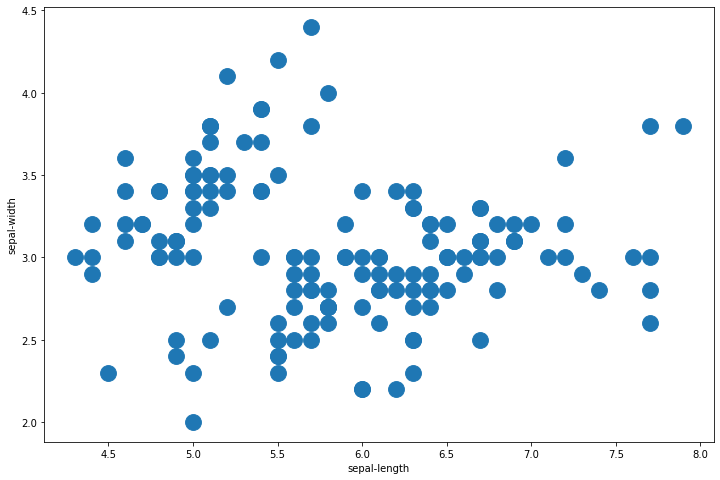

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

The first plotting shows that the clusters are not really obvious when considering sepal-length and sepal-width

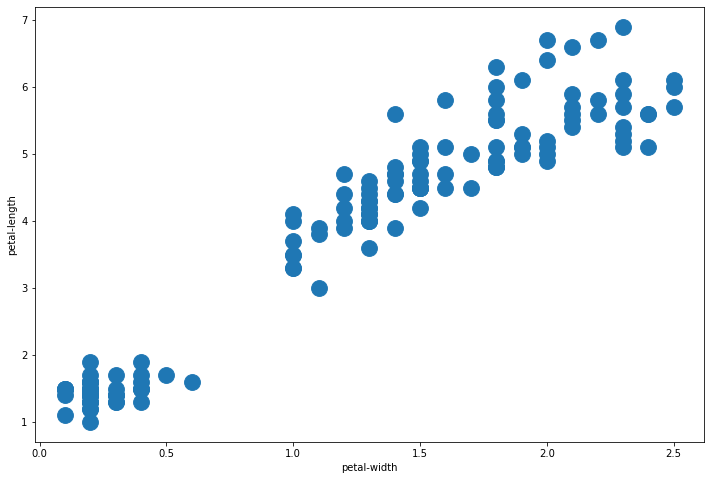

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['petal-width'], iris_df['petal-length'], s=250)

plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()

In the 2nd plot, we plot the petal-length versus petal-width. We can see from this visualisation that the data is grouped into obvious clusters 

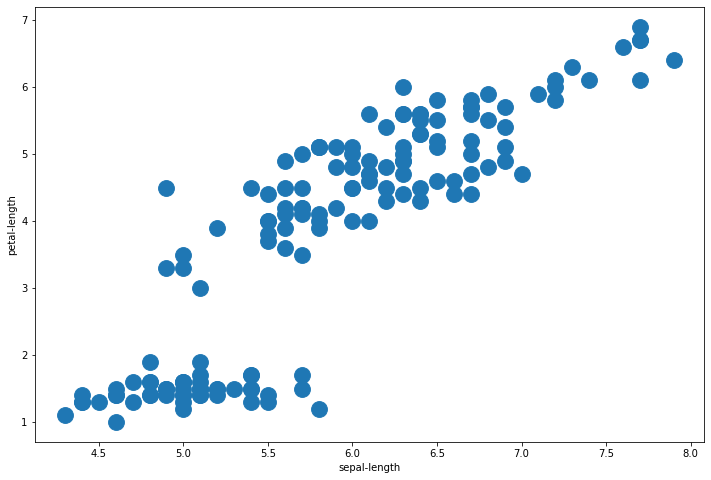

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

Plotting petal-length versus sepal-length shows that the clusters are much more obvious in this case.

# Stap 5 - Een k-mean-model maken en valideren
Hier stellen we k = 3 in voor KMeans om de dataset in 3 groepen te verdelen

Eerst gaan we clustering doen op basis van twee kenmerken: 'sepal-length' en 'petal-length'

In [23]:

iris_2D = iris_df[['sepal-length', 'petal-length']]

iris_2D.sample(5)

,sepal-length,petal-length
18,6.9,5.1
33,5.6,3.9
34,4.4,1.3
14,4.6,1.0
60,4.4,1.3


In [24]:
# Kijk naar de vorm van de tweedimensionale dataset
iris_2D.shape

(150, 2)

In [25]:
# Voordat we de gegevens in ons kmeans-object invoeren, converteren we deze naar een numpy-array
iris_2D = np.array(iris_2D)

In [26]:
# Maak het kmeans-object
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

Na het aanpassen van het clustermodel aan onze data. K-means zal labels toewijzen. Deze labels komen mogelijk niet overeen met de daadwerkelijke labels in onze dataset, vertegenwoordigd door de 'class'kolom. Ze reproduceren alleen clusters die zijn voorspeld door K-means. Categorie 0 gegenereerd door kmeans kan bijvoorbeeld verwijzen naar een andere categorie dan klasse 0 in het oorspronkelijke dataset.


In [27]:
# Kijk naar de labels die worden voorspeld door het kmeans-model
kmeans_model_2D.labels_

array([1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1,
       2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0,
       2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2,
       2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1])

Kmeans also defines 3 centers for the 3 clusters generated. The clusters can be accessed by 'cluster_centers_'

In [28]:
# Haal de centra van de clusters berekend door kmeans en sla ze op in centroids_2D 
centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49411765],
       [6.83902439, 5.67804878]])

In [29]:
iris_labels = iris_df['class']

Om de prestaties van ons model te meten, biedt sckit-learn metrische gegevens die evalueren hoe goed de clusters zijn. We zullen bijvoorbeeld homogenity_score gebruiken om ervoor te zorgen dat elk cluster alleen leden van een enkele klasse bevat, en volledigheidscore(completeness_score) om te controleren of alle leden van een bepaalde klasse aan hetzelfde cluster zijn toegewezen. 

In [30]:
# meet de homogeniteit en volledigheid van de clusters

print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))
print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))


Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843


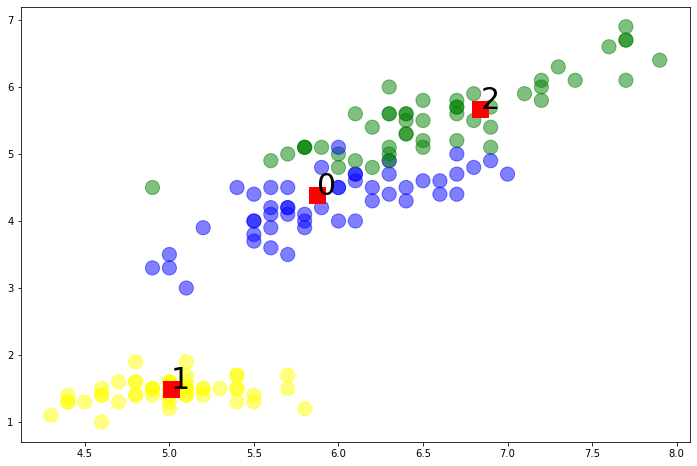

In [31]:
colors = ['yellow','blue','green']

plt.figure(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_df['class'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate( i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

Het is tijd om kmeans te gebruiken voor alle kenmerken van de dataset.  	

In [32]:
# maak een kopie van de dataset en verwijder de klasse ervan
iris_features = iris_df.drop('class', axis=1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.8,4.0,1.2,0.2
1,6.1,2.9,4.7,1.4
2,5.5,4.2,1.4,0.2
3,6.0,3.0,4.8,1.8
4,7.1,3.0,5.9,2.1


In [33]:
# klasse opslaan in een andere dataset (iris_labels)
iris_labels = iris_df['class']

iris_labels.sample(5)

107    1
54     1
106    2
28     1
79     2
Name: class, dtype: int32

Laten we nu een kmeans-object maken en dit aanpassen aan alle functies in onze dataset

In [34]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

In [35]:
# Kijk naar de labels die zijn gegenereerd door het kmeans_model-object
kmeans_model.labels_

array([0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0])

In [36]:
# Kijk naar de centroids van de clusters 
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Om het kmeans-model dat we hebben gebruikt op basis van alle functies te zien hoe presteert en het te vergelijken met het vorige, kunnen we metrics.homogenity_score en metrics.completeness_score gebruiken en hun waarden vergelijken met de metrics uit het eerste model.  

In [37]:
print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model.labels_))


Homogeneity_score:  0.7514854021988338
Completeness_score:  0.7649861514489815


Als we homegeniety en volledigheid van beide modellen vergelijken, zien we dat het toevoegen van meer functies aan het kmeans-model de prestaties verbetert.